In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0.5, 1.0, 'Розподіл між типами класів')

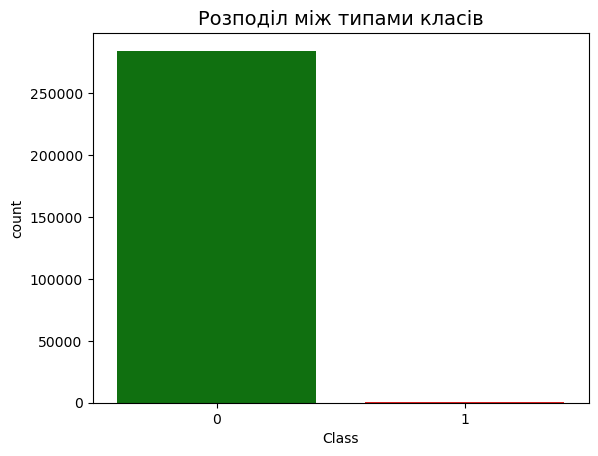

In [3]:
colors = ["g", "r"]

sns.countplot(x='Class', data=data, palette=colors)
plt.title('Розподіл між типами класів', fontsize=14)

In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
data.isnull().sum().max()

0

In [6]:
data.shape

(284807, 31)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
robust_scaler = RobustScaler()

data['sc_amount'] = robust_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['sc_time'] = robust_scaler.fit_transform(data['Time'].values.reshape(-1,1))
data.drop(['Time','Amount'], axis=1, inplace=True)

In [9]:
sc_amount = data['sc_amount']
sc_time = data['sc_time']

data.drop(['sc_amount', 'sc_time'], axis=1, inplace=True)
data.insert(0, 'sc_amount', sc_amount)
data.insert(1, 'sc_time', sc_time)

In [10]:
data.head()

,sc_amount,sc_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [11]:
X = data.drop('Class', axis=1)
y = data['Class']

spl = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_idx, test_idx in spl.split(X, y):
    print("Train:", train_idx, "Test:", test_idx)
    st_Xtrain, st_Xtest = X.iloc[train_idx], X.iloc[test_idx]
    st_ytrain, st_ytest = y.iloc[train_idx], y.iloc[test_idx]

st_Xtrain = st_Xtrain.values
st_Xtest = st_Xtest.values
st_ytrain = st_ytrain.values
st_ytest = st_ytest.values

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]


In [12]:
data = data.sample(frac=1)

fraud_data = data.loc[data['Class'] == 1]
non_fraud_data = data.loc[data['Class'] == 0][:492]
balanced_data = pd.concat([fraud_data, non_fraud_data])

ndata = balanced_data.sample(frac=1, random_state=42)
ndata.head()

,sc_amount,sc_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
217657,-0.293440,0.661251,1.960448,-0.151409,-1.666849,-0.136083,0.958964,0.565967,0.111682,0.088523,...,-0.277376,-0.056089,0.130082,0.308908,-0.248051,-0.157759,-0.017144,0.002762,-0.066364,0
172787,1.713407,0.429352,-2.628922,2.275636,-3.745369,1.226948,-1.132966,-1.256353,-1.752420,0.281736,...,0.133106,0.870730,1.269473,-0.265494,-0.480549,0.169665,0.096081,0.070036,0.063768,1
51912,-0.269964,-0.464150,-0.308955,1.165727,0.973271,-0.137330,0.597477,-0.499004,0.755520,-0.092511,...,0.237082,-0.300350,-0.735615,-0.128127,-0.469923,-0.001339,0.119434,0.252080,0.093468,0
79525,-0.293440,-0.312880,-2.630598,5.125759,-6.092255,5.527393,1.605145,-2.319884,-3.207076,-1.482583,...,0.948864,-0.527474,0.220546,-1.371110,-0.504899,0.382307,0.395528,0.782036,0.628528,1
251866,-0.252917,0.832282,0.711155,2.617105,-4.722363,5.842970,-0.600179,-1.646313,-2.785198,0.540368,...,0.461032,0.360501,-0.865526,0.139978,-0.336238,0.128449,-0.155646,0.799460,0.392170,1


In [13]:
len(ndata)

984

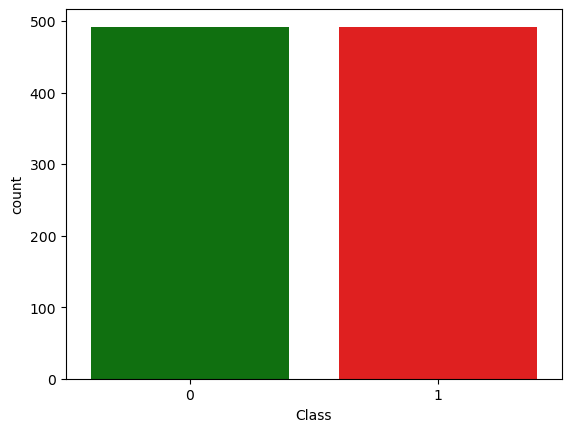

In [14]:
sns.countplot(x='Class', data=ndata, palette=colors)
plt.show()

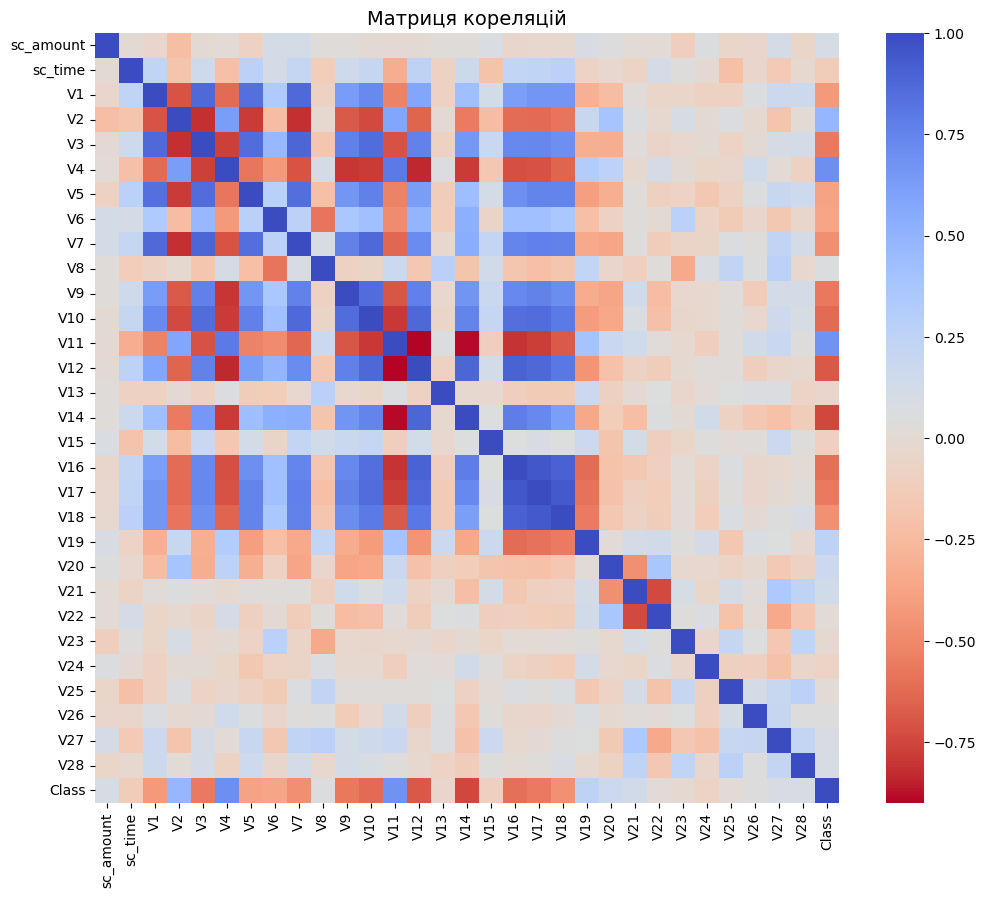

In [15]:
f = plt.figure(figsize = (12,10))
ax1 = f.add_subplot()

corr_matrix = ndata.corr()
sns.heatmap(corr_matrix, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title('Матриця кореляцій', fontsize=14)
plt.show()

In [16]:
v14_f = ndata['V14'].loc[ndata['Class'] == 1].values
q1 = np.percentile(v14_f, 25)
q3 = np.percentile(v14_f, 75)
v14_iqr = q3 - q1
print('Q1: {}, Q3: {}'.format(q1, q3))
print('IQR: {}'.format(v14_iqr))

v14_range = v14_iqr * 1.5
v14_lower = q1 - v14_range
v14_upper = q3 + v14_range
print('Range: {}'.format(v14_range))
print('V14 lower: {}'.format(v14_lower))
print('V14 upper: {}'.format(v14_upper))
outliers = [x for x in v14_f if x < v14_lower or x > v14_upper]
print('Outliers count in feature V14: {}'.format(len(outliers)))
print('V14 outliers:{}'.format(outliers))
ndata = ndata.drop(ndata[(ndata['V14'] > v14_upper) | (ndata['V14'] < v14_lower)].index)

Q1: -9.692722964972386, Q3: -4.282820849486865
IQR: 5.409902115485521
Range: 8.114853173228282
V14 lower: -17.807576138200666
V14 upper: 3.8320323237414167
Outliers count in feature V14: 4
V14 outliers:[-18.8220867423816, -18.0499976898594, -19.2143254902614, -18.4937733551053]


In [17]:
v12_f = ndata['V12'].loc[ndata['Class'] == 1].values
q1 = np.percentile(v12_f, 25)
q3 = np.percentile(v12_f, 75)
v12_iqr = q3 - q1
print('Q1: {}, Q3: {}'.format(q1, q3))
print('IQR: {}'.format(v12_iqr))

v12_range = v12_iqr * 1.5
v12_lower = q1 - v12_range
v12_upper = q3 + v12_range
print('Range: {}'.format(v12_range))
print('V12 lower: {}'.format(v12_lower))
print('V12 upper: {}'.format(v12_upper))
outliers = [x for x in v12_f if x < v12_lower or x > v12_upper]
print('Outliers count in feature V12: {}'.format(len(outliers)))
print('V12 outliers: {}'.format(outliers))
ndata = ndata.drop(ndata[(ndata['V12'] > v12_upper) | (ndata['V12'] < v12_lower)].index)

Q1: -8.67303320439115, Q3: -2.893030568676315
IQR: 5.780002635714835
Range: 8.670003953572252
V12 lower: -17.3430371579634
V12 upper: 5.776973384895937
Outliers count in feature V12: 4
V12 outliers: [-18.6837146333443, -18.4311310279993, -18.5536970096458, -18.0475965708216]


In [18]:
v10_f = ndata['V10'].loc[ndata['Class'] == 1].values
q1 = np.percentile(v10_f, 25)
q3 = np.percentile(v10_f, 75)
v10_iqr = q3 - q1
print('Q1: {}, Q3: {}'.format(q1, q3))
print('IQR: {}'.format(v10_iqr))

v10_range = v10_iqr * 1.5
v10_lower = q1 - v10_range
v10_upper = q3 + v10_range
print('Range: {}'.format(v10_range))
print('V10 lower: {}'.format(v10_lower))
print('V10 upper: {}'.format(v10_upper))
outliers = [x for x in v10_f if x < v10_lower or x > v10_upper]
print('Outliers count in feature V10: {}'.format(len(outliers)))
print('V10 outliers: {}'.format(outliers))
ndata = ndata.drop(ndata[(ndata['V10'] > v10_upper) | (ndata['V10'] < v10_lower)].index)

Q1: -7.466658535821847, Q3: -2.5118611381562523
IQR: 4.954797397665595
Range: 7.432196096498393
V10 lower: -14.89885463232024
V10 upper: 4.92033495834214
Outliers count in feature V10: 27
V10 outliers: [-24.4031849699728, -15.1241628144947, -17.1415136412892, -16.2556117491401, -16.7460441053944, -18.2711681738888, -18.9132433348732, -22.1870885620007, -24.5882624372475, -15.2318333653018, -15.1237521803455, -16.6011969664137, -15.2399619587112, -22.1870885620007, -22.1870885620007, -16.6496281595399, -16.3035376590131, -20.9491915543611, -22.1870885620007, -15.5637913387301, -23.2282548357516, -19.836148851696, -14.9246547735487, -15.2399619587112, -15.3460988468775, -15.5637913387301, -14.9246547735487]


In [19]:
X = ndata.drop('Class', axis=1)
y = ndata['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [21]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "KNearestNeighbors": KNeighborsClassifier()
}

In [22]:
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifier", classifier.__class__.__name__, "has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifier LogisticRegression has a training score of 92.0 % accuracy score
Classifier DecisionTreeClassifier has a training score of 91.0 % accuracy score
Classifier KNeighborsClassifier has a training score of 92.0 % accuracy score


In [23]:
log_reg_parameters = {"penalty": [ 'l2'], 
                      'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(max_iter=3000), log_reg_parameters)
grid_log_reg.fit(X_train, y_train)
log_reg_clf = grid_log_reg.best_estimator_

log_reg_score = cross_val_score(log_reg_clf, X_train, y_train, cv=5)
log_reg_score_percentage = round(log_reg_score.mean() * 100, 2).astype(str) + '%'
print('Cross validation score using logistic regression:', log_reg_score_percentage)

Cross validation score using logistic regression: 93.63%


In [24]:
tree_params = {"criterion": ["gini", "entropy"], 
              "max_depth": list(range(2,5,1)), 
              "min_samples_leaf": list(range(4,8,1))}

gridsearch_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
gridsearch_tree.fit(X_train, y_train)
tree_clf = gridsearch_tree.best_estimator_

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
tree_score_percentage = round(tree_score.mean() * 100, 2).astype(str) + '%'
print('Cross validation score using desicion tree: ', tree_score_percentage)

Cross validation score using desicion tree:  91.51%


In [25]:
knears_params = {"n_neighbors": list(range(2,5,1)), 
                 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

gridsearch_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
gridsearch_knears.fit(X_train, y_train)
knears_neighbors_clf = gridsearch_knears.best_estimator_

knears_score = cross_val_score(knears_neighbors_clf, X_train, y_train, cv=5)
knears_score_percentage = round(knears_score.mean() * 100, 2).astype(str) + '%'
print('Cross validation score using k-nearest neighbors', knears_score_percentage)

Cross validation score using k-nearest neighbors 92.44%


In [26]:
log_reg_score = cross_val_score(log_reg_clf, X_train, y_train, cv=5)
print('Cross validation score using logistic regression: ', log_reg_score_percentage)

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('Cross validation score using desicion tree: ', tree_score_percentage)

knears_score = cross_val_score(knears_neighbors_clf, X_train, y_train, cv=5)
print('Cross validation score using k-nearest neighbors', knears_score_percentage)

Cross validation score using logistic regression:  93.63%
Cross validation score using desicion tree:  91.51%
Cross validation score using k-nearest neighbors 92.44%


In [27]:
# log reg metrics
y_pred_log_reg = log_reg_clf.predict(X_test)
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred_log_reg)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred_log_reg)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred_log_reg)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred_log_reg)))

Recall Score: 0.92
Precision Score: 0.96
F1 Score: 0.94
Accuracy Score: 0.95


<Axes: >

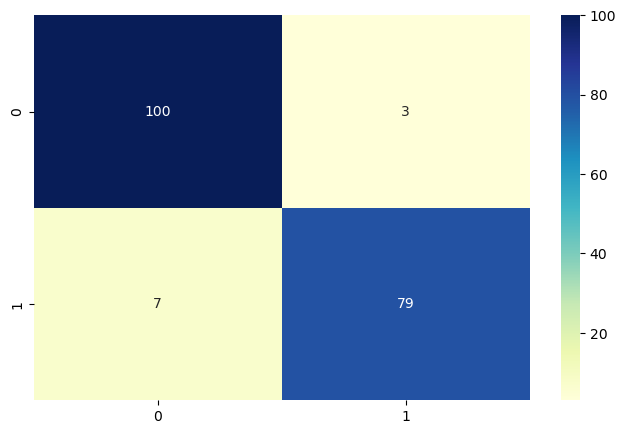

In [28]:
# log reg matrix
y_pred_log_reg = log_reg_clf.predict(X_test)
log_reg_cm = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize = (8,5))
sns.heatmap(log_reg_cm, annot=True,fmt='d',cmap="YlGnBu")

In [29]:
# tree metrics
y_pred_tree = tree_clf.predict(X_test)
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred_tree)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred_tree)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred_tree)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred_tree)))

Recall Score: 0.92
Precision Score: 0.93
F1 Score: 0.92
Accuracy Score: 0.93


<Axes: >

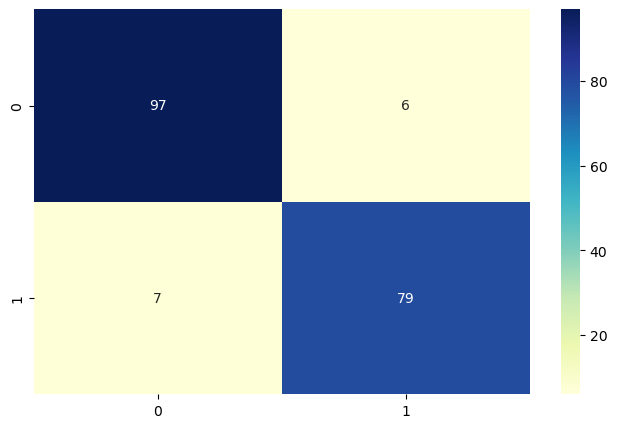

In [30]:
# tree matrix
y_pred_tree = tree_clf.predict(X_test)
tree_cm = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize = (8,5))
sns.heatmap(tree_cm, annot=True,fmt='d',cmap="YlGnBu")

In [31]:
# knears metrics
y_pred_knears = knears_neighbors_clf.predict(X_test)
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred_knears)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred_knears)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred_knears)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred_knears)))

Recall Score: 0.90
Precision Score: 0.99
F1 Score: 0.94
Accuracy Score: 0.95


<Axes: >

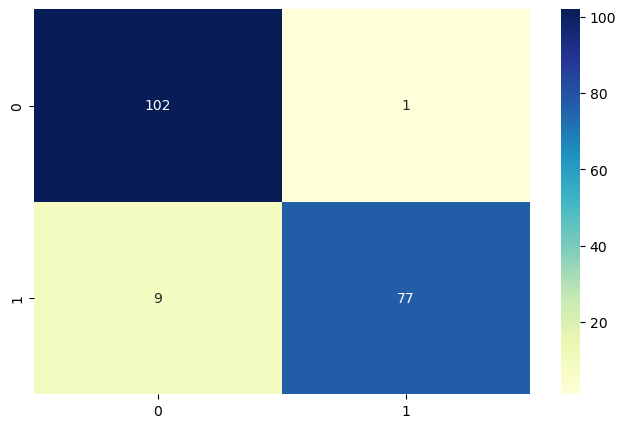

In [32]:
# knears matrix
y_pred_knears = knears_neighbors_clf.predict(X_test)
knears_cm = confusion_matrix(y_test, y_pred_knears)
plt.figure(figsize = (8,5))
sns.heatmap(knears_cm, annot=True,fmt='d',cmap="YlGnBu")

In [33]:
print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('Decision Tree:')
print(classification_report(y_test, y_pred_tree))

print('K-Nears:')
print(classification_report(y_test, y_pred_knears))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       103
           1       0.96      0.92      0.94        86

    accuracy                           0.95       189
   macro avg       0.95      0.94      0.95       189
weighted avg       0.95      0.95      0.95       189

Decision Tree:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       103
           1       0.93      0.92      0.92        86

    accuracy                           0.93       189
   macro avg       0.93      0.93      0.93       189
weighted avg       0.93      0.93      0.93       189

K-Nears:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       103
           1       0.99      0.90      0.94        86

    accuracy                           0.95       189
   macro avg       0.95      0.94      0.95       189
weighted avg       0.95      

In [34]:
log_reg_pred = cross_val_predict(log_reg_clf, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

knears_pred = cross_val_predict(knears_neighbors_clf, X_train, y_train, cv=5)

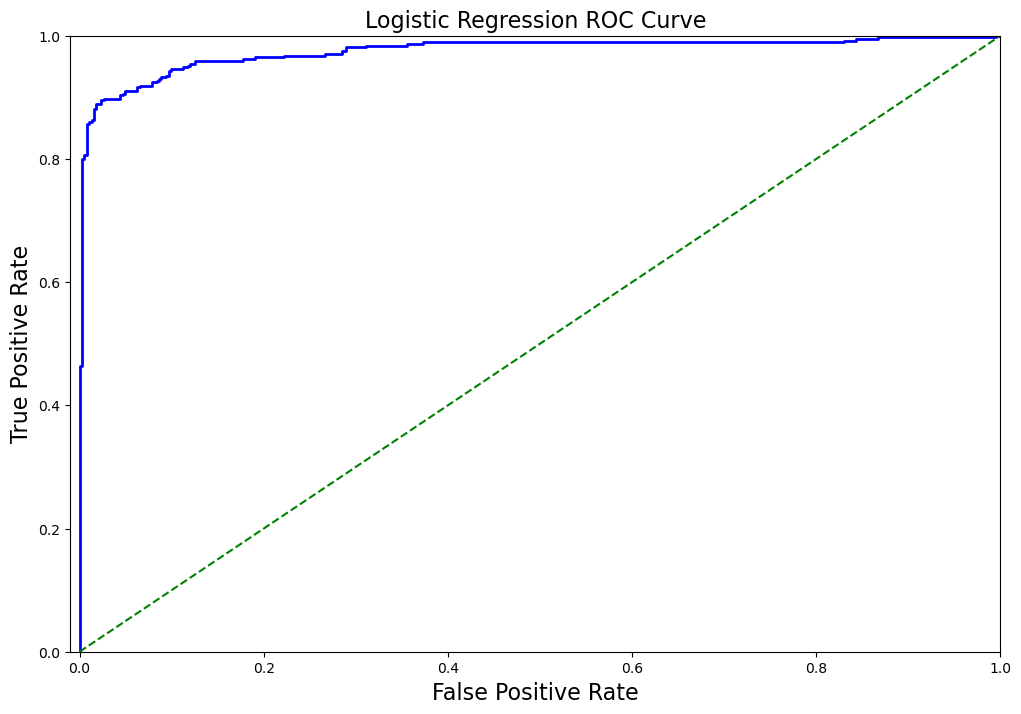

In [35]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'g--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])

logistic_roc_curve(log_fpr, log_tpr)
plt.show()

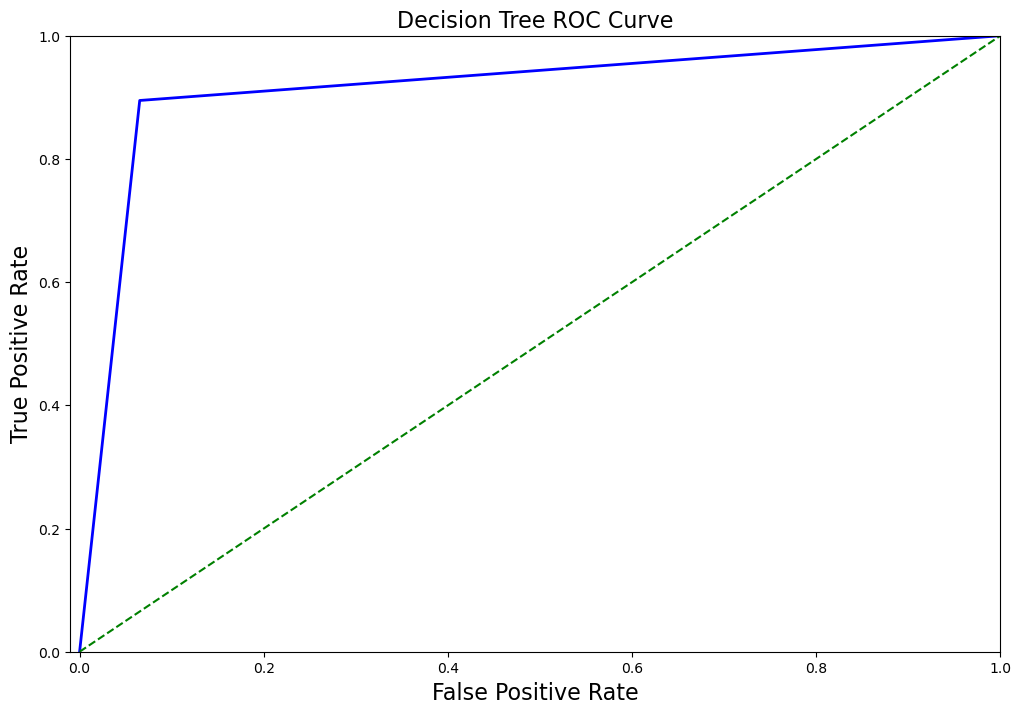

In [36]:
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)
def tree_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Decision Tree ROC Curve', fontsize=16)
    plt.plot(tree_fpr, tree_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'g--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])

tree_roc_curve(tree_fpr, tree_tpr)
plt.show()

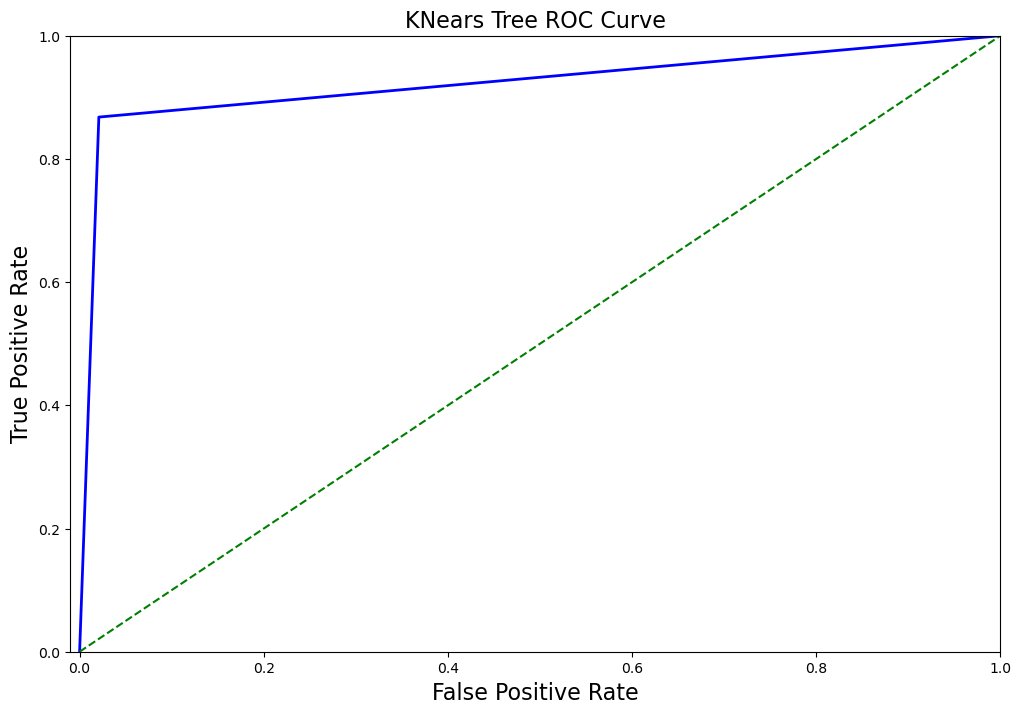

In [37]:
knears_fpr, knears_tpr, knears_threshold = roc_curve(y_train, knears_pred)
def knears_roc_curve(knears_fpr, knears_tpr):
    plt.figure(figsize=(12,8))
    plt.title('KNears Tree ROC Curve', fontsize=16)
    plt.plot(knears_fpr, knears_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'g--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])

knears_roc_curve(knears_fpr, knears_tpr)
plt.show()

In [38]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9750656260336541
KNears Neighbors:  0.9235183999211785
Decision Tree Classifier:  0.9148022773817148


In [ ]:
log_reg_sm = LogisticRegression(solver='liblinear')

rand_log_reg = RandomizedSearchCV(LogisticRegression(max_iter=3000), log_reg_parameters, n_iter=4)

log_reg_params = {"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in spl.split(st_Xtrain, st_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg)
    model = pipeline.fit(st_Xtrain[train], st_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(st_Xtrain[test])

In [ ]:
sm = SMOTE(sampling_strategy='minority', random_state=42)

Xsm_train, ysm_train = sm.fit_resample(st_Xtrain, st_ytrain)

log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)

In [ ]:
# log reg SMOTE matrix
y_pred_log_reg_sm = log_reg_sm.predict(X_test)
log_reg_cf = confusion_matrix(y_test, y_pred_log_reg_sm)
plt.figure(figsize = (8,5))
sns.heatmap(log_reg_cf, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
# log reg SMOTE metrics
y_pred_sm = log_reg_sm.predict(X_train)
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred_sm)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred_sm)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred_sm)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred_sm)))

In [ ]:
tree_sm = gridsearch_tree.best_estimator_
tree_sm.fit(Xsm_train, ysm_train)

In [ ]:
y_pred_tree_sm = tree_sm.predict(X_test)
tree_cf = confusion_matrix(y_test, y_pred_tree_sm)
plt.figure(figsize = (8,5))
sns.heatmap(tree_cf, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
y_pred_tree_sm = tree_sm.predict(X_test)
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred_tree_sm)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred_tree_sm)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred_tree_sm)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred_tree_sm)))

In [ ]:
knears_sm = gridsearch_knears.best_estimator_
knears_sm.fit(Xsm_train, ysm_train)

In [ ]:
y_pred_knears = knears_sm.predict(X_test)
knears_cf = confusion_matrix(y_test, y_pred_knears)
plt.figure(figsize = (8,5))
sns.heatmap(knears_cf, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
y_pred_knears_sm = knears_sm.predict(X_test)
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred_knears_sm)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred_knears_sm)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred_knears_sm)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred_knears_sm)))

In [ ]:
print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg_sm))

print('Decision Tree:')
print(classification_report(y_test, y_pred_tree_sm))

print('K-Nears:')
print(classification_report(y_test, y_pred_knears_sm))